In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()

# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

data = open('./sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: C:\Users\benja\Documents\Development\Python\Tensorflow Developer\Natural Language Processing\Week 4 - Sequence Models and Literature\sonnets.txt

  0%|          | 0.00/93.6k [00:00<?, ?B/s]
100%|##########| 93.6k/93.6k [00:00<00:00, 600kB/s]
100%|##########| 93.6k/93.6k [00:00<00:00, 600kB/s]


In [7]:
### START CODE HERE
from tensorflow.keras.layers import Conv1D

model = Sequential()
model.add(Embedding(total_words, 128, input_length=max_sequence_len-1))# Your Embedding Layer)
model.add(Bidirectional(LSTM(256, return_sequences = True)))# An LSTM Layer)
model.add(LSTM(128))# Another LSTM Layer)
model.add(Dense(total_words / 2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words / 2, activation='relu',))
model.add(Dropout(0.2))
model.add(Dense(total_words / 2, activation='relu'))
model.add(Dense(total_words, activation='softmax'))# A Dense Layer)
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])# Pick a loss function and an optimizer)
### END CODE HERE

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 10, 128)           411008    
                                                                 
 bidirectional_3 (Bidirectio  (None, 10, 512)          788480    
 nal)                                                            
                                                                 
 lstm_7 (LSTM)               (None, 128)               328192    
                                                                 
 dense_12 (Dense)            (None, 1605)              207045    
                                                                 
 dense_13 (Dense)            (None, 1605)              2577630   
                                                                 
 dropout_6 (Dropout)         (None, 1605)              0         
                                                      

In [8]:
history = model.fit(predictors, label, epochs=120)

Epoch 1/120
484/484 [==============================] - 51s 96ms/step - loss: 6.9903 - accuracy: 0.0222
Epoch 2/120
484/484 [==============================] - 47s 96ms/step - loss: 6.4752 - accuracy: 0.0269
Epoch 3/120
484/484 [==============================] - 47s 97ms/step - loss: 6.3134 - accuracy: 0.0274
Epoch 4/120
484/484 [==============================] - 46s 95ms/step - loss: 6.2119 - accuracy: 0.0303
Epoch 5/120
484/484 [==============================] - 46s 96ms/step - loss: 6.1231 - accuracy: 0.0351
Epoch 6/120
484/484 [==============================] - 47s 96ms/step - loss: 6.0292 - accuracy: 0.0424
Epoch 7/120
484/484 [==============================] - 46s 95ms/step - loss: 5.9389 - accuracy: 0.0455
Epoch 8/120
484/484 [==============================] - 47s 97ms/step - loss: 5.8430 - accuracy: 0.0514
Epoch 9/120
484/484 [==============================] - 46s 95ms/step - loss: 5.7371 - accuracy: 0.0559
Epoch 10/120
484/484 [==============================] - 45s 92ms/step - l

In [ ]:
model.save("shakespeare_sonnets.h5")

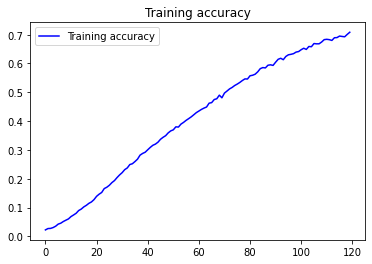

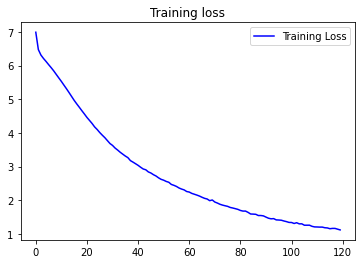

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [25]:
seed_text = "In sooth thy Bulls are top in all land"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict(token_list, verbose=0)
	predicted = np.argmax(predicted, axis=1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word

In [26]:
words = 0
sentence = ""
for w in seed_text.split():
	if words == 9:
		print(sentence)
		sentence = ""
	sentence += w + " "
	words = (words + 1) % 10

In sooth thy Bulls are top in all land 
short vouchsafe and last for overturn yellow'd where and abuse 
me free won ward won ward dead cold bow bow 
light sufficed took knowing thee kill creatures huge ground chary 
gone away for me be turn'd fiend breeds erred erred 
denote renew'd alchemy decease deem'd bred renew'd forsaken now no 
name jewel purpose me of thyself alone were renew'd touches 
doing crime silver indigest torn gone thrice away but bright 
is told lives 'greeing thrice dyed belied of too hems 
sits old bad shadows shall detain my friend ' quite 
